In [1395]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid', 'retro']) 


In [1396]:
fname = '/home/akadam/EUROfusion/2024/pedestal_transport/models/output.txt'

Tall, nall, chiall, Dall, Vall, S_Tall, S_Nall, times = [], [], [], [], [], [], [], []
modes, chi_intraall, D_intraall, V_intraall = [], [], [], []
with open(fname, 'r') as f: 
    _, nx = f.readline().strip().split()
    _, nghost = f.readline().strip().split()
    _, dx = f.readline().strip().split()
    _, psin = f.readline().strip().split(maxsplit=1)
    nx, nghost, dx = int(nx), int(nghost), float(dx)
    psin = np.fromstring(psin, sep=' ')
    # Next line will be a timestep, tout  XX.XX
    # Followed by the state variables. 
    # So we should loop through and stop when we hit a line that starts with 'tout'
    for line in f: 
        name, values = line.strip().split(maxsplit=1)
        if name == 'tout': 
            times.append(float(values))
            _, mode = f.readline().strip().split(maxsplit=1)
            _, T = f.readline().strip().split(maxsplit=1)
            _, n = f.readline().strip().split(maxsplit=1)
            _, chi = f.readline().strip().split(maxsplit=1)
            _, D = f.readline().strip().split(maxsplit=1)
            _, V = f.readline().strip().split(maxsplit=1)
            _, S_T = f.readline().strip().split(maxsplit=1)
            _, S_N = f.readline().strip().split(maxsplit=1)
            _, chi_intra = f.readline().strip().split(maxsplit=1)
            _, D_intra = f.readline().strip().split(maxsplit=1)
            _, V_intra = f.readline().strip().split(maxsplit=1)
            # append values to the lists
            Tall.append(np.fromstring(T, sep=' '))
            nall.append(np.fromstring(n, sep=' '))
            chiall.append(np.fromstring(chi, sep=' '))
            Dall.append(np.fromstring(D, sep=' '))
            Vall.append(np.fromstring(V, sep=' '))
            S_Tall.append(np.fromstring(S_T, sep=' '))
            S_Nall.append(np.fromstring(S_N, sep=' '))
            chi_intraall.append(np.fromstring(chi_intra, sep=' '))
            D_intraall.append(np.fromstring(D_intra, sep=' '))
            V_intraall.append(np.fromstring(V_intra, sep=' '))
            mode = 0 if mode=='F' else 1
            modes.append(int(mode))
psin = psin
Tall = np.stack(Tall, axis=0)# !  *1000
nall = np.stack(nall, axis=0) 
chiall = np.stack(chiall, axis=0) 
Dall = np.stack(Dall, axis=0) 
Vall = np.stack(Vall, axis=0) 
S_Tall = np.stack(S_Tall, axis=0) 
S_Nall = np.stack(S_Nall, axis=0) 
times = np.array(times)
chi_intraall = np.stack(chi_intraall, axis=0)
D_intraall = np.stack(D_intraall, axis=0)
V_intraall = np.stack(V_intraall, axis=0)
modes = np.array(modes)
boltzmann_konstant = 1.380648
Pall = (2*nall*(Tall))*boltzmann_konstant

idx_ped = np.argmin(abs(psin - 0.98343676  - 0.04383409))


In [1397]:
print('Psin', psin[0], psin[1], psin[2], psin[3], psin[-4], psin[-3], psin[-2], psin[-1])
for tidx in [0, 1, 2]: 
    print(f'{tidx}   ', Tall[tidx, 0],Tall[tidx, 1], Tall[tidx, 2],Tall[tidx, 3],Tall[tidx, -4], Tall[tidx, -3], Tall[tidx, -2], Tall[tidx, -1])
    print(f'    ', chiall[tidx, 0],chiall[tidx, 1], chiall[tidx, 2],chiall[tidx, 3],chiall[tidx, -4], chiall[tidx, -3], chiall[tidx, -2], chiall[tidx, -1])
    print()

Psin -0.005 -0.0025 0.0 0.0025 0.9975 1.0 1.0025 1.005
0    2.1693 2.1693 2.1736 2.1693 0.1037 0.1 0.1 0.1
     1.6733 1.6733 1.6733 1.6733 0.0016 0.0014 0.0014 0.0014

1    2.1597 2.1597 2.1639 2.1597 0.1333 0.1 0.1 0.1
     1.6733 1.6733 1.6733 1.6733 0.0012 0.0 0.0 0.0

2    2.1541 2.1541 2.1583 2.1541 0.1393 0.1 0.1 0.1
     1.6733 1.6733 1.6733 1.6733 0.0012 0.0 0.0 0.0



0.1 0.1 0.0


/tmp/ipykernel_31276/568673478.py:5: RuntimeWarning: invalid value encountered in scalar divide
  print(Tall[i, -1], Tall[i, -2], (Tall[i+1, -1] - Tall[i, -1]) / (times[i+1] - times[i]))


0.1 0.1 nan


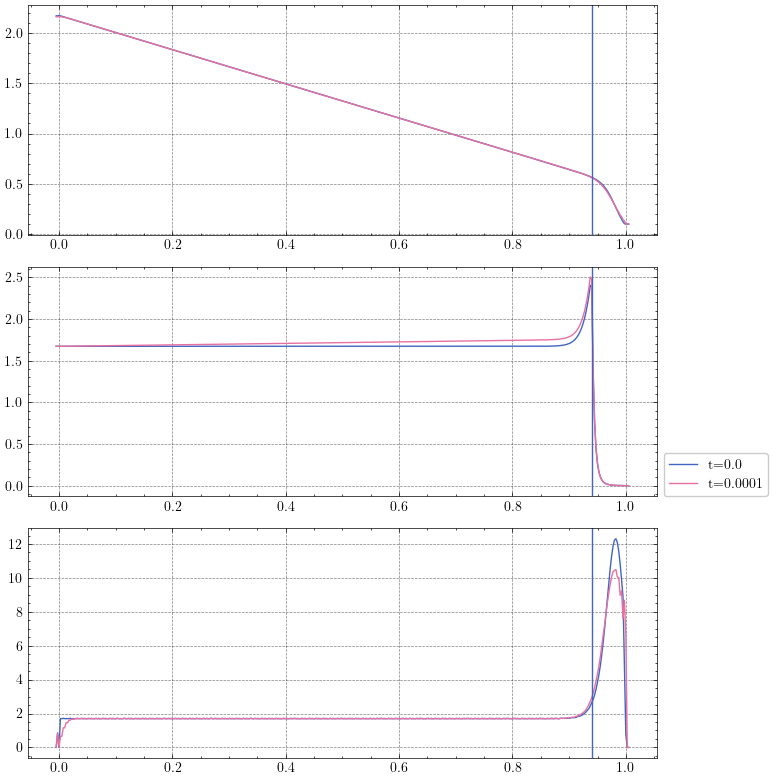

In [1398]:

fig, axs = plt.subplots(3, 1, figsize=(8, 8)) 

axs = axs.ravel()
for i in [0, 1]:# 50, 100, 300, 400]:
    print(Tall[i, -1], Tall[i, -2], (Tall[i+1, -1] - Tall[i, -1]) / (times[i+1] - times[i]))
    axs[0].plot(psin, Tall[i], label='T')
    axs[1].plot(psin, chiall[i], label=f't={times[i]:.3}')
    axs[2].plot(psin, abs(np.gradient(Tall, dx, axis=1)[i] ))
for ax in axs: 
    ax.axvline(0.98343676 - 0.04383409)
axs[1].legend(loc=(1.01, 0.0))
plt.tight_layout()

In [1399]:
print(psin[:3], psin[-3:])

[-0.005  -0.0025  0.    ] [1.     1.0025 1.005 ]


In [1400]:
psin = psin[nghost:-2]
Tall = Tall[:, nghost:-2]
nall = nall[:, nghost:-2]
chiall = chiall[:, nghost:-2]
Dall = Dall[:, nghost:-2]
Vall = Vall[:, nghost:-2]
S_Tall = S_Tall[:, nghost:-2]
S_Nall = S_Nall[:, nghost:-2]
Pall = Pall[:, nghost:-2]
chi_intraall = chi_intraall[:, nghost:-2]
D_intraall = D_intraall[:, nghost:-2]
V_intraall = V_intraall[:, nghost:-2]
heatflux_all = chiall * np.gradient(Tall, psin, axis=1) * psin

In [1401]:
print(psin[:3], psin[-3:])

[0.     0.0025 0.005 ] [0.995  0.9975 1.    ]


In [1402]:
psi_window = psin > 0.8 #  - 0.04383409

Tall = Tall[:, psi_window]
nall = nall[:, psi_window]
chiall = chiall[:, psi_window]
Dall = Dall[:, psi_window]
Vall = Vall[:, psi_window]
S_Tall = S_Tall[:, psi_window]
S_Nall = S_Nall[:, psi_window]
psin = psin[psi_window]
heatflux_all = heatflux_all[:, psi_window]
Pall = Pall[:, psi_window]
chi_intraall = chi_intraall[:, psi_window]
D_intraall = D_intraall[:, psi_window]
V_intraall = V_intraall[:, psi_window]

idx_ped = np.argmin(abs(psin - (0.98343676  - 0.04383409)))


(np.float64(0.1), np.float64(0.1037), np.float64(0.04445586068555295))

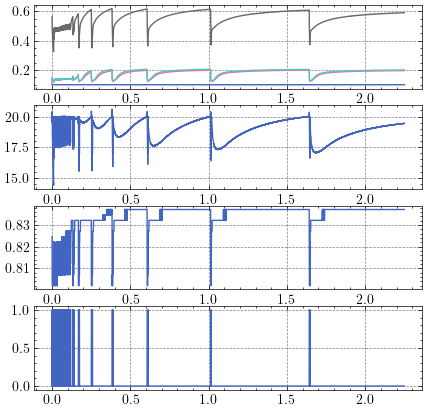

In [1403]:

fig, axs = plt.subplots(4, 1, figsize=(5, 5))

axs[0].plot(times, Tall[:, -1])
axs[0].plot(times, Tall[:, -2])
axs[0].plot(times, Tall[:, -3])
axs[0].plot(times, Tall[:, idx_ped])
# axs[0].plot(times, (-heatflux_all[: -1] * 30 / 2000 * (7.0/2.0))**(2.0/7.0))
# axs[0].plot(times, (-heatflux_all[:, -1] * 30 / 2000 * (7.0/2.0)**(2.0/7.0))*1000)
pressure_grad = -np.gradient(Pall, dx, axis=1)
axs[1].plot(times, np.max(pressure_grad[:, idx_ped:], axis=1))
axs[3].plot(times, modes)
axs[2].plot(times, [psin[idx] for idx in np.argmax(pressure_grad[:, idx_ped:], axis=1)])
Tall[0, -1], Tall[0, -2], (-heatflux_all[0, -1] * 30 / 2000 * (7.0/2.0)**(2.0/7.0))*1000

# for ax in axs: 
#     ax.set_xlim(0, 0.003)

/tmp/ipykernel_31276/1688824303.py:20: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


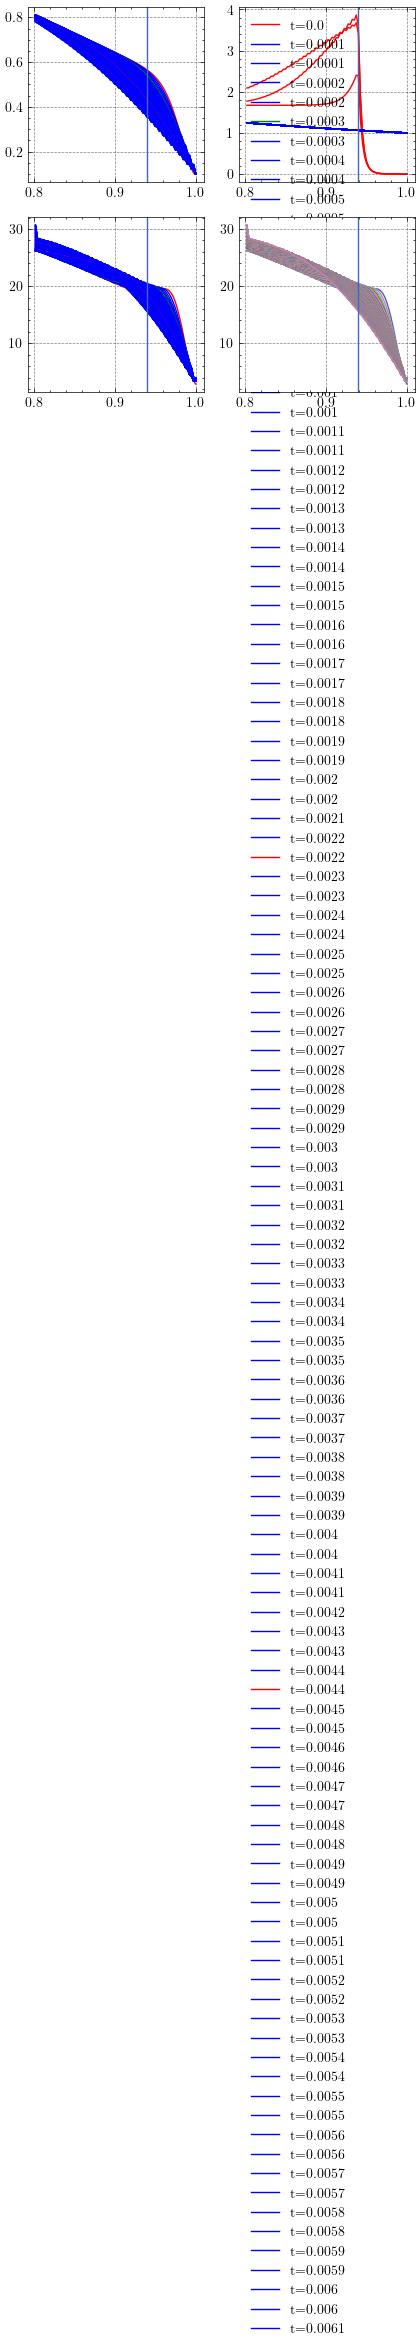

In [1413]:
fig, axs = plt.subplots(2, 2, figsize=(5, 5)) 

axs = axs.ravel()
for i in range(120):
    color = 'r' if modes[i] == 0 else 'b'
    if i == 5: 
        color = 'g'
    chi_to_plot = chiall[i] if modes[i] == 0 else chi_intraall[i]
    # print(Tall[i, -1], Tall[i, -2], (Tall[i+1, -1] - Tall[i, -1]) / (times[i+1] - times[i]))
    axs[0].plot(psin, Tall[i], label='T', color=color)
    axs[1].plot(psin, chi_to_plot, label=f't={times[i]:.3}', color=color)
    axs[2].plot(psin, abs(np.gradient(Pall[i], dx)), color=color) 
    axs[3].plot(psin, -np.gradient(Pall[i], dx))
    # axs[2].plot(psin, nall[i])
    # axs[4].plot(psin, Pall[i])
for ax in axs: 
    ax.axvline(0.98343676 - 0.04383409)
# axs[0].set_ylim(0, 3)
axs[1].legend(frameon=False)
plt.tight_layout()

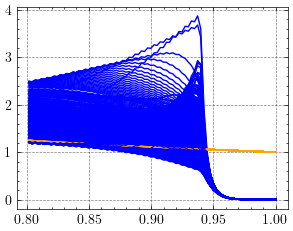

In [1405]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

for i in range(len(times)): 
    if modes[i] == 0: 
        ax1.plot(psin, chiall[i], color='blue')
    else: 
        ax1.plot(psin, chi_intraall[i], color='orange')
    if times[i] > 0.1: 
        break 


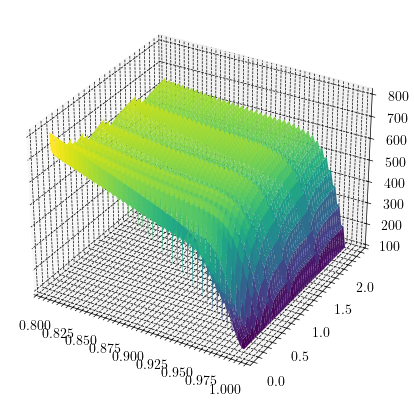

In [1406]:
X, Y = np.meshgrid(psin, times)

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111, projection='3d')
# Plot Temperature 3D 
ax1.plot_surface(X, Y, Tall*1000, cmap='viridis')

(43624, 80) (43624, 80) (43624, 80)


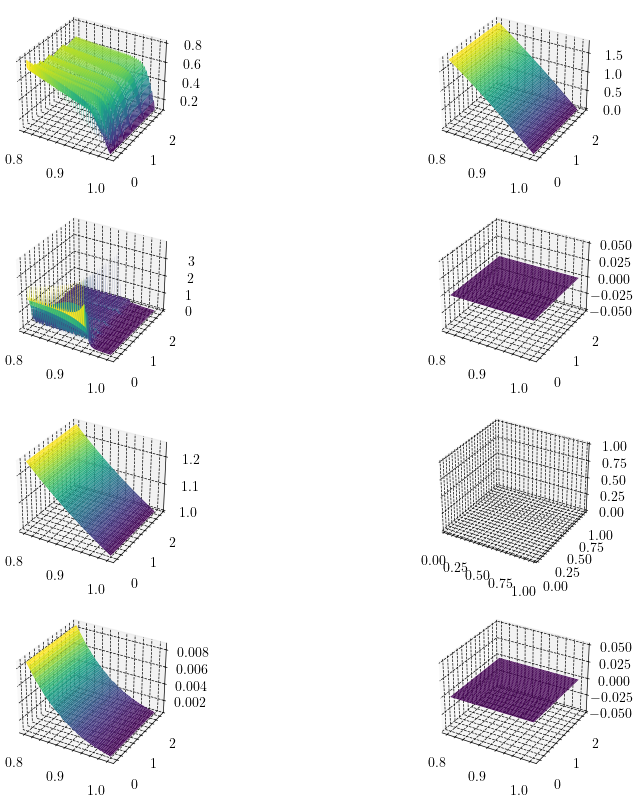

In [1407]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(421, projection='3d')
ax2 = fig.add_subplot(422, projection='3d')

ax3 = fig.add_subplot(423, projection='3d')
ax4 = fig.add_subplot(424, projection='3d')

ax5 = fig.add_subplot(425, projection='3d')
ax6 = fig.add_subplot(426, projection='3d')
ax7 = fig.add_subplot(427, projection='3d')
ax8 = fig.add_subplot(428, projection='3d')


X, Y = np.meshgrid(psin, times)
print(Tall.shape, X.shape, Y.shape)
ax1.plot_surface(X, Y, Tall, cmap='viridis')
ax2.plot_surface(X, Y, nall, cmap='viridis')
ax3.plot_surface(X, Y, chiall, cmap='viridis')
ax4.plot_surface(X, Y, Dall, cmap='viridis')
ax5.plot_surface(X, Y, chi_intraall, cmap='viridis')
ax7.plot_surface(X, Y, S_Tall, cmap='viridis')
ax8.plot_surface(X, Y, S_Nall, cmap='viridis')


# ax7.plot_surface(X, Y, np.gradient(Tall, psin, axis=-1), cmap='viridis')

plt.show()

In [1408]:
Tall[0,-1], Tall[0,-2], (-heatflux_all[0, -1] * 30 / 2000 * (7.0/2.0))**(2.0/7.0), -heatflux_all[0, -1] / 1E6, 50**(7.0/2.0)*2000/30*(2.0/7.0) / 1E6


(np.float64(0.1),
 np.float64(0.1037),
 np.float64(0.07372001996047965),
 np.float64(2.0720000000000412e-09),
 16.835875742536842)

In [1409]:
#

In [1410]:
gamma = 5/3.0
